In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path

In [2]:
#Установка рабочей директории на домашнюю папку (где должны находиться рабочие файлы)
os.chdir(Path.home())
print([i for i in os.listdir() if 'rent' in i])

['rent_roll_1.xlsx', 'rent_roll_3.xlsx', 'rent_roll_2.xlsx']


In [38]:
# Объединение и открытие файлов (под индексом будет колнна "№ п/п")
df = pd.concat([pd.read_excel(i, index_col = '№ п/п') for i in os.listdir() if 'rent' in i], ignore_index=True)
df.head(10)

ValueError: No objects to concatenate

In [37]:
pd.read_excel('/rent_roll_1.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '../rent_roll_1.xlsx'

In [10]:
## Выбрасываем все nan данные 
df.dropna(inplace = True)
df

,Этаж,Категория,"Площади в аренде, кв. м"
0,-1,Автозапчасти,77.40
1,-1,фитнес-клуб,773.20
2,-1,Товары для дома,157.60
4,-1,Автосервис,206.00
5,-1,Товары для дома,60.00
...,...,...,...
887,3,Склад,20.98
888,3,Склад,23.15
889,3,кухня,59.35
892,3,Склад,258.86


In [11]:
# Объединение похожих категорий

df.Категория = df.Категория.str.strip()       # Если категории имеют в начале или в конце пробел(ы) 
                                              # (' ') - удаляем этот символ

df.Категория = df.Категория.str.capitalize()  # Все названия категорий делаем с заглавной буквой  

#Вручную заменяем исправляем категории которые написаны либо с ошибкой либо с лишним пробелом или др.
df = df.replace({'Категория': {'Банкомат': 'Банк', 
'Кафе, рестораны': 'Кафе и рестораны', 'Красота издоровье': 'Красота и здоровье',
'кафе и рестораны': 'Кафе и рестораны', 'Спотривные товары': 'Спортивные товары',
'Финтнес клуб': 'Фитнес-клуб', 'Банковское': 'Банк', 'Электроника': 'Бытовая техника и электроника',
'Зоотовары': 'Зоомагазин', 'Кафе': 'Кафе и рестораны', 'Лотереи': 'Лотерея', 'Фитнес центр': 'Фитнес-клуб',
'Продукты': 'Продукты и прочее', 'Развлечение': 'Развлечения', 'Обувь и сумки': 'Одежда и аксессуары',
'Детские товары': 'Товары для детей', 'Путешествия': 'Туризм','Бижутерия': 'Ювелирные изделия'}})



In [12]:
sense = pd.DataFrame(data = df.groupby('Категория').sum())     


In [21]:
# Создаем DataFrame в котором будет храниться информация о занимаемой площади
# каждой категорие и доля от всей площади (%)

# Группировка по категории  
sense = pd.DataFrame(data = df.groupby('Категория').sum())     

# Создаем numpy массив с нулями для дальнейшей работы
popul = np.zeros(len(sense[sense.columns[-1]]))               

# Циклом проходим по pandas объекту sense, где num - № элемента i, 
# i - числовые данные по каждой категории
for num,i in enumerate(sense[sense.columns[-1]]):
    
# Вычисляем долю занимаемой площади путем отношения 
# площади занимаемой категорией к занимаемой площади всеми категориями и округляем до 4 знаков
    popul[num] = np.round(i/sense[sense.columns[-1]].sum(), 4)

# Переводим в столбец 'Доля площади от всего' в проценты и транспонируем
sense['Доля площади от всего'] = popul * 100
sense.T

Категория,Автозапчасти,Автосервис,Аксессуары,Аптека,Ателье,Банк,Бытовая техника и электроника,Вендинг,Зоомагазин,Каток,...,Товары для дома,Товары для отдыха,Туризм,Фитнес-клуб,Химчистка,Чай и кофе,Часы,Эксплуатационная компания,Ювелирная мастерская,Ювелирные изделия
"Площади в аренде, кв. м",77.40,206.00,483.52,98.90,16.08,411.13,13179.74,35.67,415.30,475.00,...,22124.37,68.06,259.2,10547.12,92.70,74.72,49.84,224.00,4.0,2019.37
Доля площади от всего,0.03,0.08,0.19,0.04,0.01,0.16,5.17,0.01,0.16,0.19,...,8.67,0.03,0.1,4.13,0.04,0.03,0.02,0.09,0.0,0.79


/home/hacktone/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


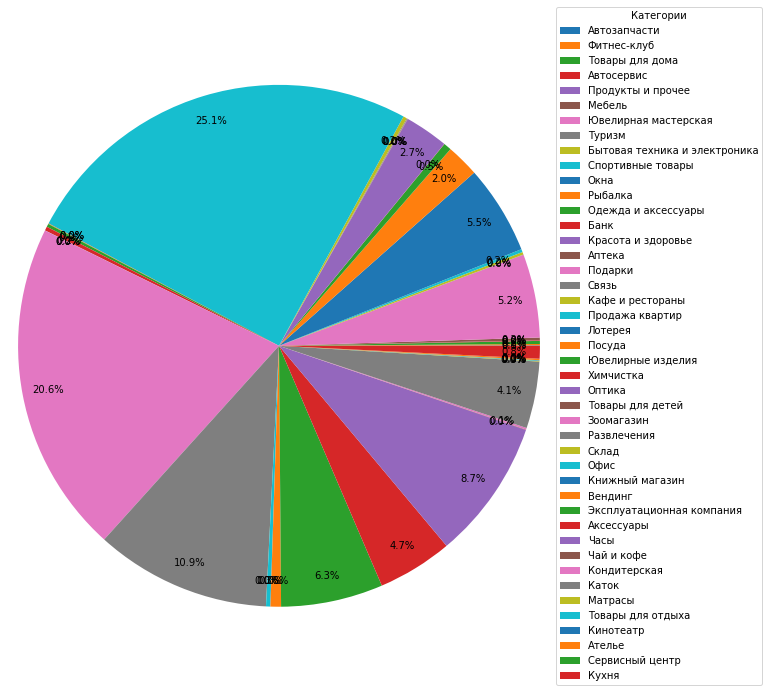

In [17]:
# Создаем области рисунка: 1-ая область - сам рисунок
# 2-ая это спецификация к рисунку с указанием соотношение цвета и названия

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(aspect="equal"))

 
wedges, texts, autotexts = ax.pie(df.groupby('Категория').sum(), autopct= '%1.1f%%',
                                  textprops=dict(color="k"), radius=1.2, pctdistance = 0.9)

ax.legend(wedges, df.Категория.unique(),
          title="Категории",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10)
plt.show()

In [358]:
print(len(df.Категория.unique()),df.Категория.unique())
for num,i in enumerate(df.Категория):
    df.Категория[num] = i.capitalize().strip()
print('\n\n',len(df.Категория.unique()), df.Категория.unique())

69 ['Автозапчасти' 'фитнес-клуб' 'Товары для дома' 'Автосервис'
 'Продукты и прочее' 'Мебель' 'Ювелирная мастерская' 'Туризм'
 'электроника' 'Спортивные товары' 'Окна' 'Рыбалка' 'мебель'
 'обувь и сумки' 'Банкомат' 'Красота и здоровье' 'Аптека' 'Подарки'
 'Связь' 'Банк' 'Кафе, рестораны' 'продажа квартир' 'красота издоровье'
 'лотерея' 'посуда' 'Ювелирные изделия' 'Химчистка' 'Оптика'
 'Детские товары' 'Бытовая техника и электроника' 'зоомагазин' 'связь'
 'продукты' 'красота и здоровье' 'одежда и аксессуары' 'Кафе и рестораны'
 'товары для детей' 'развлечение' ' кафе и рестораны' 'кафе'
 'Одежда и аксессуары' 'Банковское' 'Развлечения' 'Склад' 'Продукты'
 'Обувь и сумки' 'Лотереи' 'Путешествия' 'Офис' 'Книжный магазин'
 'Фитнес центр' 'Вендинг' 'эксплуатационная компания' 'Спотривные товары'
 'Аксессуары' 'Часы' 'Чай и кофе' 'Кондитерская' 'Бижутерия' 'Каток'
 'Матрасы' 'Товары для отдыха' 'Зоотовары' 'Кинотеатр' 'Ателье'
 'Товары для детей' 'Сервисный центр' 'Финтнес клуб' 'кухня']


/home/hacktone/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until




 63 ['Автозапчасти' 'Фитнес-клуб' 'Товары для дома' 'Продукты и прочее'
 'Мебель' 'Ювелирная мастерская' 'Туризм' 'Электроника'
 'Спортивные товары' 'Окна' 'Рыбалка' 'Обувь и сумки' 'Банкомат'
 'Красота и здоровье' 'Подарки' 'Связь' 'Банк' 'Красота издоровье'
 'Посуда' 'Ювелирные изделия' 'Кафе, рестораны' 'Химчистка' 'Оптика'
 'Детские товары' 'Бытовая техника и электроника' 'Зоомагазин' 'Продукты'
 'Одежда и аксессуары' 'Кафе и рестораны' 'Товары для детей' 'Развлечение'
 'кафе и рестораны' 'Кафе' 'Банковское' 'Развлечения' 'Склад' 'Лотереи'
 'Путешествия' 'Книжный магазин' 'Аксессуары' 'Чай и кофе' 'Бижутерия'
 'Каток' 'Матрасы' 'Товары для отдыха' 'Зоотовары' 'Сервисный центр'
 'Финтнес клуб' 'Кухня' 'Кондитерская' 'Кинотеатр' 'Ателье' 'кухня'
 'Автосервис' 'Аптека' 'Продажа квартир' 'Лотерея' 'Офис' 'Фитнес центр'
 'Вендинг' 'Эксплуатационная компания' 'Спотривные товары' 'Часы']


/home/hacktone/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


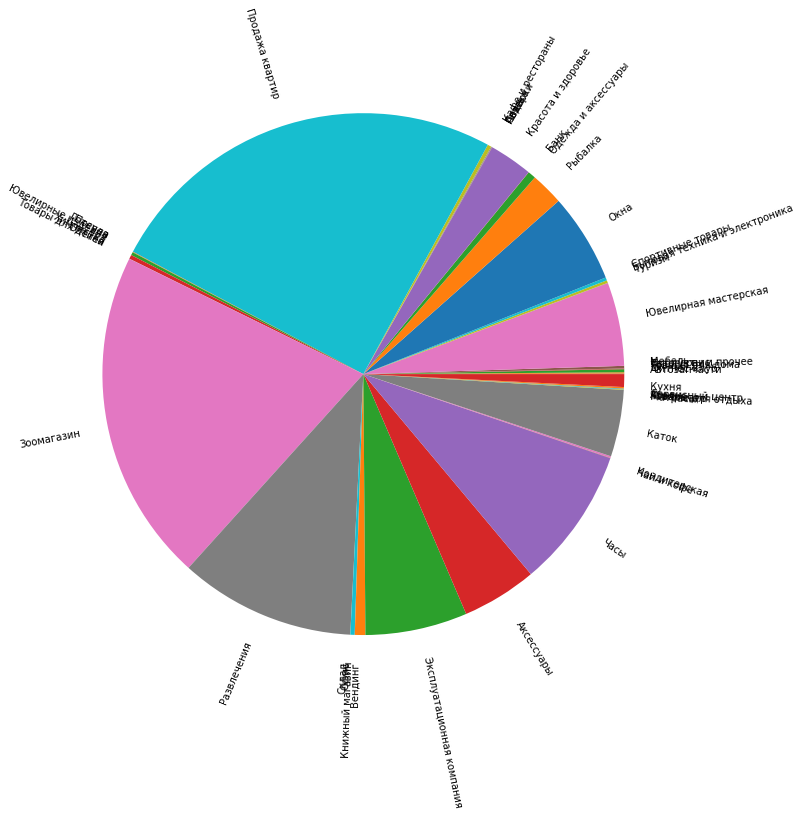

In [21]:
df.groupby('Категория').sum()
plt.figure(figsize=[20,12])
plt.pie(df.groupby('Категория').sum(), labels = df.Категория.unique(), rotatelabels = 45)
plt.show()

In [151]:
for num,i in enumerate(df.Категория):
    df.Категория[num] = i.capitalize().strip()

#for num_word1, i in enumerate(df.Категория.unique()):
#    print('1ое слово - {}'.format(i))
#    for num_word2, j in enumerate(df.Категория.unique()):
#        print('2ое слово - {}'.format(j))
#        if i[:3] == j[:3]:
#            df.Категория[num_word2] = df.Категория[num_word1]
print(df.Категория.unique(),'\n\n')

df[df['Категория'] == 'кухня']
df.loc[889, 'Категория'] = df.loc[889, 'Категория'].capitalize() 
print(df.Категория.unique())

/home/hacktone/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['Автозапчасти' 'Фитнес-клуб' 'Товары для дома' 'Продукты и прочее'
 'Мебель' 'Ювелирная мастерская' 'Туризм' 'Электроника'
 'Спортивные товары' 'Окна' 'Рыбалка' 'Обувь и сумки' 'Банкомат'
 'Красота и здоровье' 'Подарки' 'Связь' 'Банк' 'Красота издоровье'
 'Посуда' 'Ювелирные изделия' 'Кафе, рестораны' 'Химчистка' 'Оптика'
 'Детские товары' 'Бытовая техника и электроника' 'Зоомагазин' 'Продукты'
 'Одежда и аксессуары' 'Кафе и рестораны' 'Товары для детей' 'Развлечение'
 'кафе и рестораны' 'Кафе' 'Банковское' 'Развлечения' 'Склад' 'Лотереи'
 'Путешествия' 'Книжный магазин' 'Аксессуары' 'Чай и кофе' 'Бижутерия'
 'Каток' 'Матрасы' 'Товары для отдыха' 'Зоотовары' 'Сервисный центр'
 'Финтнес клуб' 'Кухня' 'Кондитерская' 'Кинотеатр' 'Ателье' 'кухня'
 'Автосервис' 'Аптека' 'Продажа квартир' 'Лотерея' 'Офис' 'Фитнес центр'
 'Вендинг' 'Эксплуатационная компания' 'Спотривные товары' 'Часы'] 


['Автозапчасти' 'Фитнес-клуб' 'Товары для дома' 'Продукты и прочее'
 'Мебель' 'Ювелирная мастерская' 'Т

/home/hacktone/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [154]:
#for count in range(50):
    for num_word_1, i in enumerate(df.Категория):
        if ('кафе' or 'рестор' or 'кухня' or 'чай' or 'кондитерс') in i.lower():
            df.Категория[num_word_1] = 'Кафе и рестораны'
        elif 'продукт' in i.lower():
            df.Категория[num_word_1] = 'Продуктовый магазин'
        elif 'фитнес' in i.lower():
            df.Категория[num_word_1] = 'Фитнес клуб'
        elif ('товары для дома' or 'посуда' or 'кухня' or 'Матрасы') in i.lower():
            df.Категория[num_word_1] = 'Фитнес клуб'
        


IndentationError: unexpected indent (<ipython-input-154-119303a38bad>, line 2)

In [140]:
'кафе' in 'Кафе, рестораны'.lower()

True

In [32]:
#df[df.columns[1:]]
#plt.pie(df[df.columns[-1]], labels = df.Категория)
#plt.show()

In [72]:
for num, i in enumerate(df.Категория):
    if i == 'фитнес-клуб' or i == 'Финтнес клуб' or i == 'Фитнес центр':
        df.Категория[num] = 'Фитнес клуб'
    elif i=='Банк' or  i=='Банковское' or i == 'Банкомат':
        df.Категория[num] = 'Банк'
    elif i==' кафе и рестораны' or i=='Кафе и рестораны' or i=='Кафе, рестораны' or i=='кафе':
        df.Категория[num] = 'Кафе и рестораны'
    elif i=='Продукты' or  i=='Продукты и прочее' or i=='продукты':
        df.Категория[num] = 'Продукты'
    elif i=='Спортивные товары' or  i=='Спотривные товары':
        df.Категория[num] = 'Спортивные товары'
    elif i=='красота и здоровье' or i=='красота издоровье':
        df.Категория[num] = 'Красота и здоровье'
    elif i=='обувь и сумки' or i=='Обувь и сумки':
        df.Категория[num] = 'Обувь и сумки'
    elif i=='Одежда и аксессуары' or i=='одежда и аксессуары':
        df.Категория[num] = 'Одежда и аксессуары'
    else:
        continue

Angdd
sdsdsda
Fkhblfklhklh


In [105]:
def alpha(mass):
    mass_len = len(mass)
    maxlen = 0
    alpha_dict = {}
    for i in mass:
        if len(i) > maxlen:
            maxlen = len(i)
        for j in i.lower():
            if j in alpha_dict:
                alpha_dict[j] += 1
            else:
                alpha_dict[j] = 1
    
    zero_data = np.zeros((mass_len, len(alpha_dict)))
    sum_zero_data = np.zeros(mass_len)
    #print('GOTCHA', len(alpha_dict))
    
    for num_word, i in enumerate(mass[:10]):
        #print(i)
        for num_letter,j in enumerate(i.lower()):
            #print(j)
            count = 0
            for k, v in alpha_dict.items():
                #print(k,j)
                if k == j:
                    zero_data[num_word, count] = 1
                else:
                    count += 1
    #print(zero_data[1])
    #print(alpha_dict)
    for num,i in enumerate(zero_data[:10]):
        sum_zero_data[num] = i.sum()
    
    
    #for num,i in enumerate(mass[:10]):
    for num_sum ,j in enumerate(sum_zero_data[:10]):
        nearest = 999
        for num_sum_1,k in enumerate(sum_zero_data[:10]):
            if sum_zero_data[num_sum] - k < nearest:
                nearest = sum_zero_data[num_sum] - k
                nearest_word_coef_1 = num_sum
                nearest_word_coef_2 = num_sum_1
        print(nearest, mass[nearest_word_coef_1], mass[nearest_word_coef_2])
        
        
        
        
        #flag = True
        #if flag:
        #    current_value = (sum_zero_data[num_sum] - sum_zero_data[num_sum + 1]) ** 2
        #    if (sum_zero_data[num_sum] - sum_zero_data[num_sum + 1]) < nearest_value:
        #        nearest_value = sum_zero_data[num_sum] - sum_zero_data[num_sum + 1]
        #        nearest_word_coef_1 = num_sum 
        #        nearest_word_coef_2 = num_sum + 1
    
    #print(nearest_value, mass[nearest_word_coef_1], mass[nearest_word_coef_2])
        
        
    
    #return sum_zero_data
            
            

In [106]:
alpha(mass)

-5.0 Автозапчасти Ювелирная мастерская
-3.0 фитнес-клуб Ювелирная мастерская
-3.0 Товары для дома Ювелирная мастерская
-6.0 Автосервис Ювелирная мастерская
-2.0 Продукты и прочее Ювелирная мастерская
-9.0 Мебель Ювелирная мастерская
0.0 Ювелирная мастерская Ювелирная мастерская
-8.0 Туризм Ювелирная мастерская
-4.0 электроника Ювелирная мастерская
-2.0 Спортивные товары Ювелирная мастерская


In [13]:
planets = sns.load_dataset('planets')

In [14]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [31]:
planets.groupby('method')['orbital_period'].min()

method
Astrometry                        246.360000
Eclipse Timing Variations        1916.250000
Imaging                          4639.150000
Microlensing                     1825.000000
Orbital Brightness Modulation       0.240104
Pulsar Timing                       0.090706
Pulsation Timing Variations      1170.000000
Radial Velocity                     0.736540
Transit                             0.355000
Transit Timing Variations          22.339500
Name: orbital_period, dtype: float64

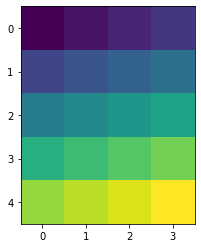

In [14]:
# Create an example image and colourbar
img = np.arange(20).reshape(5,4)
plt.imshow(img)
plt.colorbar()

# Get the current axis 
ax = plt.gca()        

# Get the images on an axis
im = ax.images        

# Assume colorbar was plotted last one plotted last
cb = im[-1].colorbar   

# Do any actions on the colorbar object (e.g. remove it)
cb.remove()

